<a href="https://colab.research.google.com/github/sadiashoaib415/Quantum_Computer/blob/main/Quantum_Hardware_Run01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ============================
# 1️⃣ Install / Upgrade Qiskit
# ============================
!pip install -q -U qiskit qiskit-ibm-runtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.8 MB/s eta 0:00:00


In [2]:
# ============================
# 2️⃣ Imports
# ============================
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.visualization import plot_histogram

In [4]:
# ============================
# 3️⃣ Save IBM Quantum API Token (run once)
# ============================
# Replace "YOUR_API_TOKEN_HERE" with your IBM Quantum API key
QiskitRuntimeService.save_account(
     channel="ibm_quantum_platform",
     token="6m4PQGwTduqxUndjDxLiSiEwajfzozw0xDOPrByiuOiT",
     plans_preference=["open"],
     overwrite=True
 )

In [5]:
# ============================
# 4️⃣ Initialize IBM Quantum Service
# ============================
service = QiskitRuntimeService(plans_preference=["open"])
print("IBM Quantum service initialized")

qiskit_runtime_service.__init__:WARNING:2026-01-22 19:37:58,459: Instance was not set at service instantiation. Based on the following filters: (tags: None, region: us-east, eu-de, plans_preference: open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().


IBM Quantum service initialized


In [8]:
# ============================
# 5️⃣ Choose Backend
# ============================
real_backends = service.backends(
    simulator=False,
    operational=True,
    min_num_qubits=1
)

if not real_backends:
    print("No real backends available, using simulator")
    backend = service.backend("ibmq_qasm_simulator")
    use_real = False
else:
    # Pick the least busy real backend
    backend = min(real_backends, key=lambda b: b.status().pending_jobs)
    use_real = True

print(f"Using backend: {backend.name} ({'REAL hardware!' if use_real else 'Simulator'})")
if use_real:
    print(f"Queue: ~{backend.status().pending_jobs} jobs ahead")


qiskit_runtime_service.backends:WARNING:2026-01-22 19:39:17,197: Loading instance: open-instance, plan: open


Using backend: ibm_torino (REAL hardware!)
Queue: ~0 jobs ahead


In [9]:
# ============================
# 6️⃣ Create 1-Qubit Circuit
# ============================
qc = QuantumCircuit(1, 1)
qc.h(0)       # Put qubit in superposition
qc.measure(0, 0)
print("Circuit:")
print(qc.draw())  # ASCII drawing (safe for Colab)

Circuit:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


In [10]:
# ============================
# 7️⃣ Transpile Circuit
# ============================
t_qc = transpile(qc, backend)
print("Transpiled Circuit:")
print(t_qc.draw())

Transpiled Circuit:
global phase: π/4
          ┌─────────┐┌────┐┌─────────┐┌─┐
q_0 -> 18 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤M├
          └─────────┘└────┘└─────────┘└╥┘
     c: 1/═════════════════════════════╩═
                                       0 


In [11]:
# ============================
# 8️⃣ Run with SamplerV2
# ============================
sampler = Sampler(mode=backend)
job = sampler.run([t_qc], shots=1024)
print(f"\nJob submitted! ID: {job.job_id()}")
if use_real:
    print(f"Track live: https://quantum-computing.ibm.com/jobs/{job.job_id()}")



Job submitted! ID: d5p7qa9h2mqc739dsk40
Track live: https://quantum-computing.ibm.com/jobs/d5p7qa9h2mqc739dsk40


In [12]:
# ============================
# 9️⃣ Get Results
# ============================
result = job.result()
counts = result[0].data.c.get_counts()
print(f"\nResults ({'Real Quantum' if use_real else 'Simulator'}):")
print(counts)



Results (Real Quantum):
{'1': 495, '0': 529}


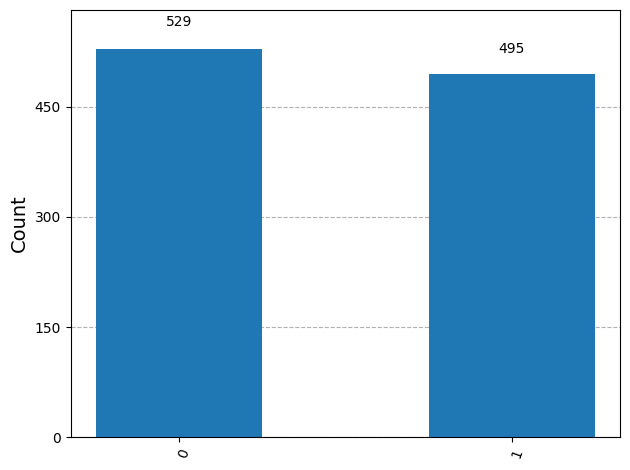

In [15]:
# ============================
# 🔟 Plot Histogram
# ============================
plot_histogram(counts)